In [6]:
import numpy as np
from abstractLinModel import LinearModel
from typing import Union, Tuple
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, Union

class LogitRegression:
    def __init__(self, learning_rate: float, iterations: int, verbose: bool = False, l1: float = 0.0, l2: float = 0.0):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.verbose = verbose
        self.l1 = l1
        self.l2 = l2

    def fit(self, X: np.ndarray, Y: np.ndarray) -> 'LogitRegression':
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.iterations):
            self.update_weights()
            if self.verbose and (i % 100 == 0 or i == self.iterations - 1):
                loss_value = self.loss()
                print(f"Iteration {i + 1}/{self.iterations} - Loss: {loss_value:.4f}")

        return self

    def update_weights(self) -> 'LogitRegression':
        A = 1 / (1 + np.exp(-(self.X.dot(self.W) + self.b)))
        tmp = (A - self.Y.T).reshape(self.m)
        
        dW = (np.dot(self.X.T, tmp) / self.m) + (self.l1 * np.sign(self.W) / self.m) + (self.l2 * self.W / self.m)
        db = np.sum(tmp) / self.m

        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db
        return self

    def loss(self) -> float:
        A = 1 / (1 + np.exp(-(self.X.dot(self.W) + self.b)))
        epsilon = 1e-15
        A = np.clip(A, epsilon, 1 - epsilon)
        log_loss = -np.mean(self.Y * np.log(A) + (1 - self.Y) * np.log(1 - A))

        l1_loss = self.l1 * np.sum(np.abs(self.W)) / self.m
        l2_loss = self.l2 * np.sum(np.square(self.W)) / (2 * self.m)
        return log_loss + l1_loss + l2_loss

    def predict(self, X: np.ndarray) -> np.ndarray:
        Z = 1 / (1 + np.exp(-(X.dot(self.W) + self.b)))
        return np.where(Z > 0.5, 1, 0)

    def train_test_split(self, x: Union[np.ndarray, pd.DataFrame], y: Union[np.ndarray, pd.Series], test_size: float = 0.2) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        test_count = int(len(x) * test_size)
        indices = np.random.permutation(len(x))
        test_indices = indices[:test_count]
        train_indices = indices[test_count:]
        X_train, X_test = x[train_indices], x[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        return X_train, X_test, y_train, y_test

# Нормализация данных
def normalize_features(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)



Iteration 1/10000 - Loss: 0.6922
Iteration 101/10000 - Loss: 0.6190
Iteration 201/10000 - Loss: 0.5767
Iteration 301/10000 - Loss: 0.5508
Iteration 401/10000 - Loss: 0.5342
Iteration 501/10000 - Loss: 0.5230
Iteration 601/10000 - Loss: 0.5153
Iteration 701/10000 - Loss: 0.5098
Iteration 801/10000 - Loss: 0.5058
Iteration 901/10000 - Loss: 0.5029
Iteration 1001/10000 - Loss: 0.5007
Iteration 1101/10000 - Loss: 0.4990
Iteration 1201/10000 - Loss: 0.4977
Iteration 1301/10000 - Loss: 0.4967
Iteration 1401/10000 - Loss: 0.4960
Iteration 1501/10000 - Loss: 0.4954
Iteration 1601/10000 - Loss: 0.4949
Iteration 1701/10000 - Loss: 0.4945
Iteration 1801/10000 - Loss: 0.4942
Iteration 1901/10000 - Loss: 0.4940
Iteration 2001/10000 - Loss: 0.4938
Iteration 2101/10000 - Loss: 0.4937
Iteration 2201/10000 - Loss: 0.4935
Iteration 2301/10000 - Loss: 0.4935
Iteration 2401/10000 - Loss: 0.4934
Iteration 2501/10000 - Loss: 0.4933
Iteration 2601/10000 - Loss: 0.4933
Iteration 2701/10000 - Loss: 0.4932
Iter

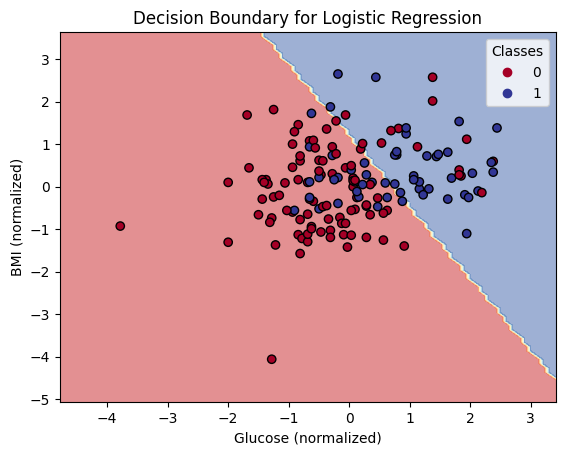

In [24]:
data = pd.read_csv("diabetes.csv")

# Загрузка и обработка данных
X = data[['Glucose', 'BMI']].values
y = data['Outcome'].values

# Применение нормализации
X = normalize_features(X)

# Обучение модели
model = LogitRegression(learning_rate=0.01, iterations=10000, verbose=True, l1=0.1, l2=0.1)
X_train, X_test, y_train, y_test = model.train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

# Предсказание и оценка точности
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

# Визуализация разделяющей границы
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.xlabel('Glucose (normalized)')
    plt.ylabel('BMI (normalized)')
    plt.title("Decision Boundary for Logistic Regression")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

plot_decision_boundary(X_test, y_test, model)